In [2]:
import pandas as pd

cols = ['engine_id', 'cycle'] + \
       [f'op_setting_{i}' for i in range(1, 4)] + \
       [f'sensor_measurement_{i}' for i in range(1, 22)]

df = pd.read_csv('../data/train_FD001.txt', sep=' ', header=None)
df.drop(columns=[26, 27], inplace=True)  # drop blank columns at the end
df.columns = cols

df.head()

engine_id  cycle  op_setting_1  op_setting_2  op_setting_3  \
0          1      1       -0.0007       -0.0004         100.0   
1          1      2        0.0019       -0.0003         100.0   
2          1      3       -0.0043        0.0003         100.0   
3          1      4        0.0007        0.0000         100.0   
4          1      5       -0.0019       -0.0002         100.0   

   sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  \
0                518.67                641.82               1589.70   
1                518.67                642.15               1591.82   
2                518.67                642.35               1587.99   
3                518.67                642.35               1582.79   
4                518.67                642.37               1582.85   

   sensor_measurement_4  sensor_measurement_5  ...  sensor_measurement_12  \
0               1400.60                 14.62  ...                 521.66   
1               1403.14                 14.62  ...                 522.28   
2               1404.20                 14.62  ...                 522.42   
3               1401.87                 14.62  ...                 522.86   
4               1406.22                 14.62  ...                 522.19   

   sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
0                2388.02                8138.62                 8.4195   
1                2388.07                8131.49                 8.4318   
2                2388.03                8133.23                 8.4178   
3                2388.08                8133.83                 8.3682   
4                2388.04                8133.80                 8.4294   

   sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  \
0                   0.03                    392                   2388   
1                   0.03                    392                   2388   
2                   0.03                    390                   2388   
3                   0.03                    392                   2388   
4                   0.03                    393                   2388   

   sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  
0                  100.0                  39.06                23.4190  
1                  100.0                  39.00                23.4236  
2                  100.0                  38.95                23.3442  
3                  100.0                  38.88                23.3739  
4                  100.0                  38.90                23.4044  

[5 rows x 26 columns]

In [3]:
# Calculate max cycle for each engine
max_cycle_df = df.groupby('engine_id')['cycle'].max().reset_index()
max_cycle_df.columns = ['engine_id', 'max_cycle']

# Merge with original dataframe
df = df.merge(max_cycle_df, on='engine_id')
df['RUL'] = df['max_cycle'] - df['cycle']
df.drop(columns=['max_cycle'], inplace=True)

# Preview the result
df[['engine_id', 'cycle', 'RUL']].head()


engine_id  cycle  RUL
0          1      1  191
1          1      2  190
2          1      3  189
3          1      4  188
4          1      5  187

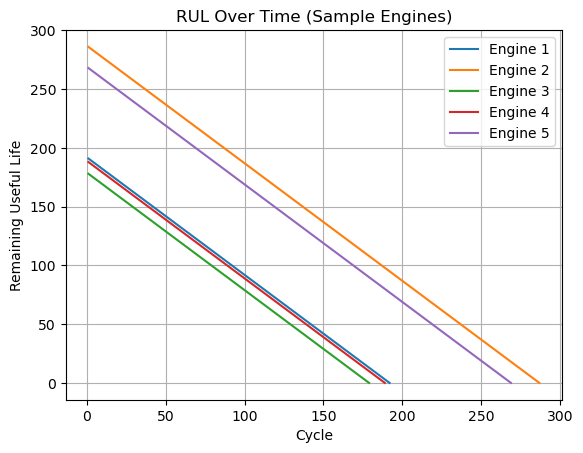

In [4]:
import matplotlib.pyplot as plt

# Pick first 5 engines
sample_engines = df['engine_id'].unique()[:5]

# Plot RUL vs cycle for each engine
for eid in sample_engines:
    edata = df[df['engine_id'] == eid]
    plt.plot(edata['cycle'], edata['RUL'], label=f'Engine {eid}')

plt.xlabel('Cycle')
plt.ylabel('Remaining Useful Life')
plt.title('RUL Over Time (Sample Engines)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
sensor_cols = [col for col in df.columns if 'sensor' in col]
print(sensor_cols)


['sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21']


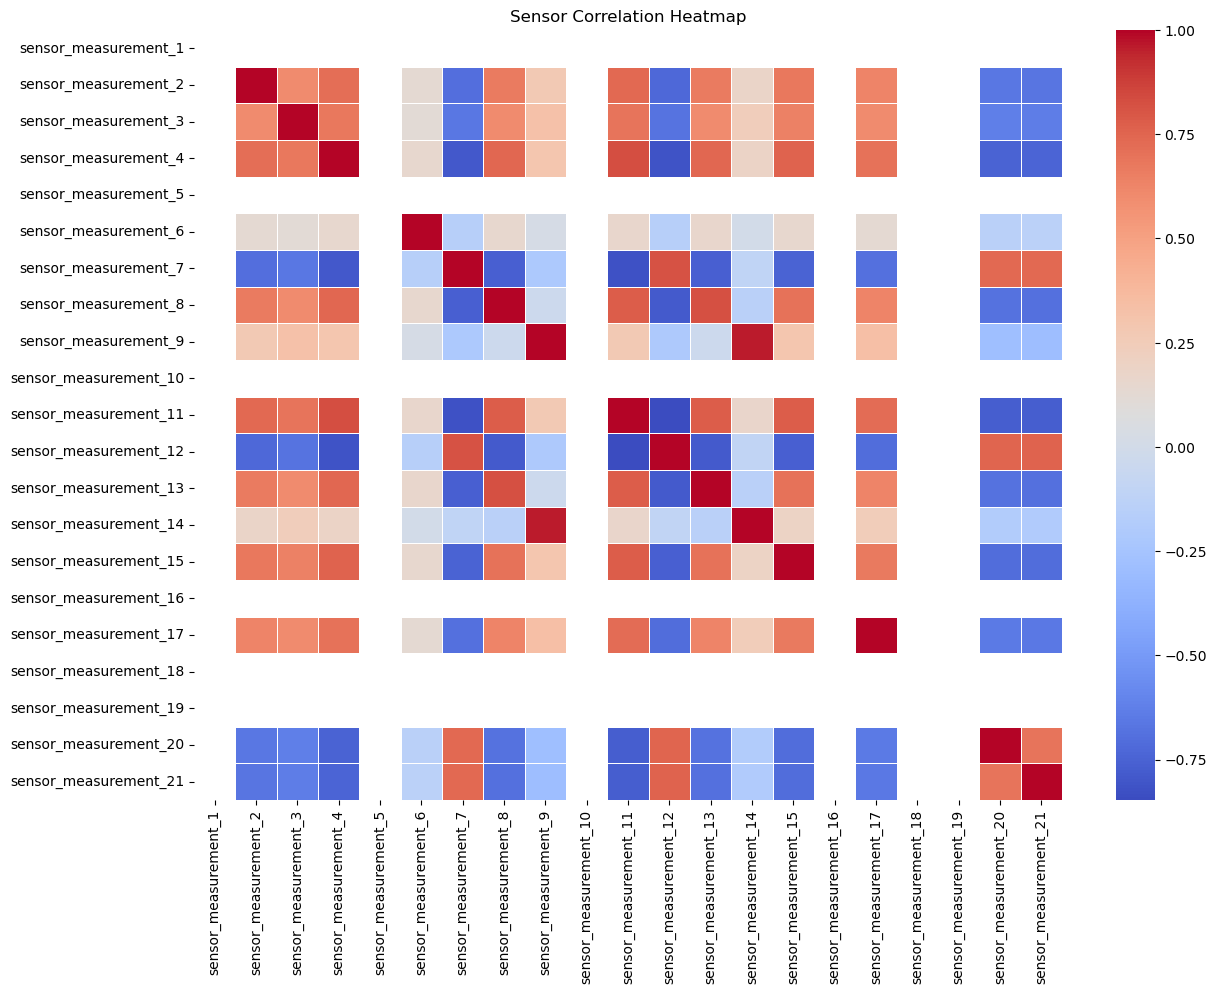

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
corr = df[sensor_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Sensor Correlation Heatmap")
plt.show()


In [7]:
df[sensor_cols].describe().T[['mean', 'std']].sort_values('std')


mean           std
sensor_measurement_19   100.000000  0.000000e+00
sensor_measurement_18  2388.000000  0.000000e+00
sensor_measurement_16     0.030000  1.556432e-14
sensor_measurement_10     1.300000  4.660829e-13
sensor_measurement_5     14.620000  3.394700e-12
sensor_measurement_1    518.670000  6.537152e-11
sensor_measurement_6     21.609803  1.388985e-03
sensor_measurement_15     8.442146  3.750504e-02
sensor_measurement_8   2388.096652  7.098548e-02
sensor_measurement_13  2388.096152  7.191892e-02
sensor_measurement_21    23.289705  1.082509e-01
sensor_measurement_20    38.816271  1.807464e-01
sensor_measurement_11    47.541168  2.670874e-01
sensor_measurement_2    642.680934  5.000533e-01
sensor_measurement_12   521.413470  7.375534e-01
sensor_measurement_7    553.367711  8.850923e-01
sensor_measurement_17   393.210654  1.548763e+00
sensor_measurement_3   1590.523119  6.131150e+00
sensor_measurement_4   1408.933782  9.000605e+00
sensor_measurement_14  8143.752722  1.907618e+01
sensor_measurement_9   9065.242941  2.208288e+01

In [9]:
low_variance_sensors = ['sensor_measurement_1', 'sensor_measurement_5', 'sensor_measurement_10']
df.drop(columns=low_variance_sensors, inplace=True)


In [10]:
sensor_cols = [col for col in df.columns if 'sensor' in col and col not in low_variance_sensors]
print(sensor_cols)


['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16', 'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20', 'sensor_measurement_21']


In [11]:
df[['engine_id', 'cycle', 'RUL'] + sensor_cols].head()


engine_id  cycle  RUL  sensor_measurement_2  sensor_measurement_3  \
0          1      1  191                641.82               1589.70   
1          1      2  190                642.15               1591.82   
2          1      3  189                642.35               1587.99   
3          1      4  188                642.35               1582.79   
4          1      5  187                642.37               1582.85   

   sensor_measurement_4  sensor_measurement_6  sensor_measurement_7  \
0               1400.60                 21.61                554.36   
1               1403.14                 21.61                553.75   
2               1404.20                 21.61                554.26   
3               1401.87                 21.61                554.45   
4               1406.22                 21.61                554.00   

   sensor_measurement_8  sensor_measurement_9  ...  sensor_measurement_12  \
0               2388.06               9046.19  ...                 521.66   
1               2388.04               9044.07  ...                 522.28   
2               2388.08               9052.94  ...                 522.42   
3               2388.11               9049.48  ...                 522.86   
4               2388.06               9055.15  ...                 522.19   

   sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
0                2388.02                8138.62                 8.4195   
1                2388.07                8131.49                 8.4318   
2                2388.03                8133.23                 8.4178   
3                2388.08                8133.83                 8.3682   
4                2388.04                8133.80                 8.4294   

   sensor_measurement_16  sensor_measurement_17  sensor_measurement_18  \
0                   0.03                    392                   2388   
1                   0.03                    392                   2388   
2                   0.03                    390                   2388   
3                   0.03                    392                   2388   
4                   0.03                    393                   2388   

   sensor_measurement_19  sensor_measurement_20  sensor_measurement_21  
0                  100.0                  39.06                23.4190  
1                  100.0                  39.00                23.4236  
2                  100.0                  38.95                23.3442  
3                  100.0                  38.88                23.3739  
4                  100.0                  38.90                23.4044  

[5 rows x 21 columns]

In [12]:
df.to_csv('../data/train_FD001_cleaned.csv', index=False)